#**Descripción de las variables**

Durante todo este análisis se utilizó un total de 7 variables, de las cuales 6 fueron consideradas como variables de entrada y 1 como variable de salida. Estas variables fueron seleccionadas por su relevancia para los modelos de agrupamiento, clasificación y pronóstico.

**ID:** Identificador único asignado a cada individuo en la base de datos. No se utiliza en el análisis, ya que no aporta información relevante.

**Sex:** Indica el sexo del individuo. Se utiliza para analizar posibles diferencias en ingresos o características de agrupamiento entre hombres y mujeres.

**Marital status:** Describe el estado civil del individuo (como soltero o casado). Puede influir en los patrones de ingreso o el tipo de ocupación.
Age: Representa la edad del individuo. Es una variable clave que puede estar relacionada con la experiencia laboral, el nivel educativo alcanzado y el ingreso.

**Education:** Nivel educativo alcanzado por el individuo, lo cual puede estar directamente relacionado con el ingreso y el tipo de ocupación.

**Income:** Ingreso del individuo. Es la principal variable objetivo en los modelos de pronóstico y también se incluye en el agrupamiento para segmentar perfiles según capacidad adquisitiva.

**Occupation:** Categoriza el tipo de ocupación del individuo. Se usa como variable objetivo en el modelo de clasificación para entender cómo las características personales influyen en el tipo de empleo.

**Settlement size:** Indica el tamaño del lugar donde reside el individuo (por ejemplo, ciudad, suburbio o zona rural). Esta variable puede influir en el acceso a oportunidades laborales y nivel de ingresos.

#**Clustering K- Means**

0. Se procede con la carga de las librerías de trabajo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#se procede con la implementacion del modelo
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se procede con la carga de los datos de trabajo.

In [ ]:
nxl='/content/drive/MyDrive/segmentation data.csv'
XDB=pd.read_csv(nxl)
XDB=XDB[['ID','Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
XDB=XDB.dropna()

display(XDB)



,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Miramos correlaciones y variables importantes

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

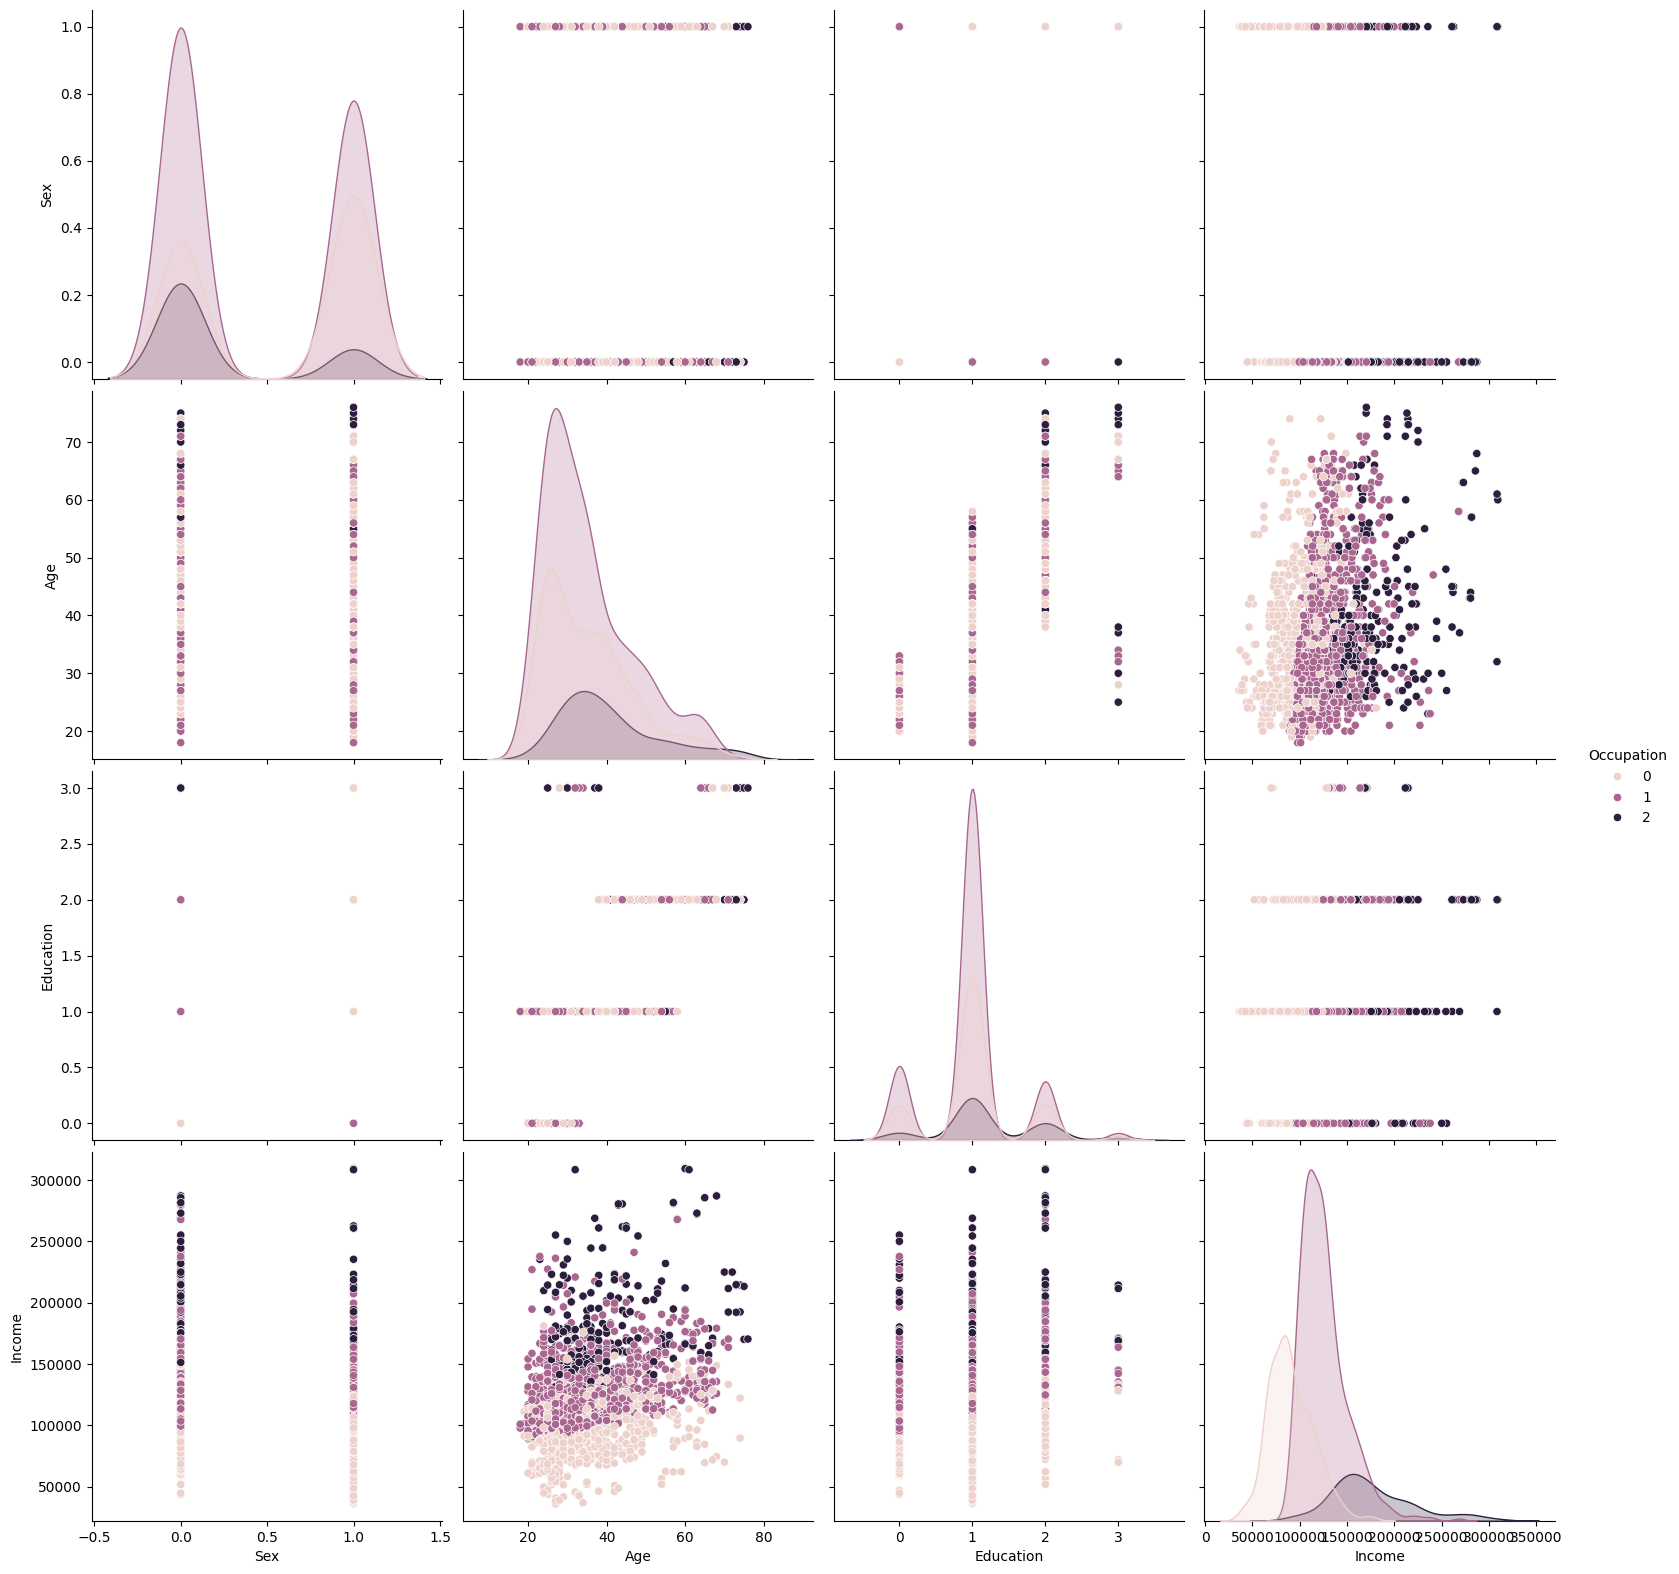

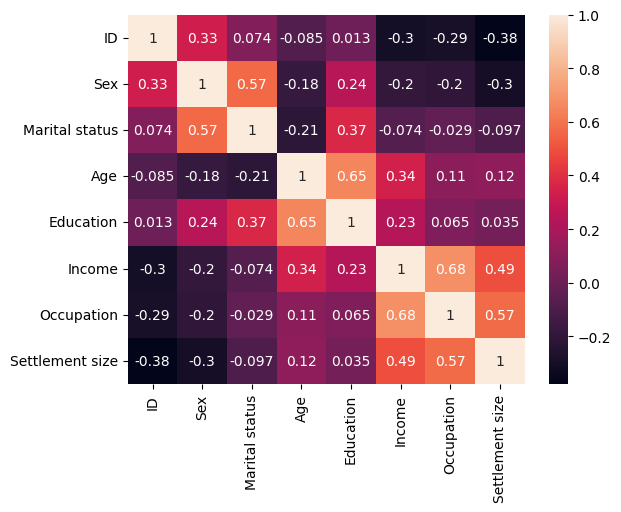

In [ ]:
plt.figure()#este es por si quiero un tamaño especifico de las graficas
sns.pairplot(XDB,hue='Occupation',size=4, vars=['Sex','Age','Education','Income'])  #hue es el valor de salida, size es la cantidad de valores de entrada y vars son los v de entrada
plt.show()

plt.figure()
sns.heatmap(XDB.corr(),annot=True)
plt.show()

3. Se procede con la implementación del modelo de clusterización

In [ ]:
XD=XDB[['Sex','Age','Education','Income']]
yd=XDB[['Occupation']]

np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=nc, random_state=42)
mkm.fit(XD,yd)
centroids=mkm.cluster_centers_
print("Los centroides son:\n", centroids)

labels=mkm.labels_
print("Los labels son:\n", labels)
XDB['labels']=labels
display(XDB)


ND=np.bincount(labels)
print("El tamaño de los clusters es:\n",ND)
# Contar la cantidad de datos en cada cluster
cluster_counts = np.bincount(labels)

# Mostrar la cantidad de individuos por cluster
for i, count in enumerate(cluster_counts):
    print(f"El cluster {i} tiene {count} individuos.")

NDesemp = XDB.groupby('labels').agg({"Occupation": lambda x: (x == 0).sum()})
NObrero = XDB.groupby('labels').agg({"Occupation": lambda x: (x == 1).sum()})
NProf = XDB.groupby('labels').agg({"Occupation": lambda x: (x == 2).sum()})

print("Número de desempleados por cluster:\n", NDesemp)
print("Número de obreros por cluster:\n", NObrero)
print("Número de profesionales por cluster:\n", NProf)

# Porcentaje por tipo de ocupación
NDesemp['Occupation'] = NDesemp['Occupation'] / ND
NObrero['Occupation'] = NObrero['Occupation'] / ND
NProf['Occupation'] = NProf['Occupation'] / ND

print("Porcentaje de desempleados por cluster:\n", NDesemp)
print("Porcentaje de obreros por cluster:\n", NObrero)
print("Porcentaje de profesionales por cluster:\n", NProf)

Los centroides son:
 [[4.06574394e-01 3.83581315e+01 1.11072664e+00 1.30523069e+05]
 [2.33766234e-01 4.46363636e+01 1.32467532e+00 2.36360312e+05]
 [5.51724138e-01 3.23189655e+01 8.76436782e-01 7.35897356e+04]
 [2.89115646e-01 4.19421769e+01 1.24149660e+00 1.66571310e+05]
 [5.46230441e-01 3.21934566e+01 9.41678521e-01 1.04815885e+05]]
Los labels son:
 [0 3 4 ... 2 4 2]


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,labels
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,3
2,100000003,0,0,49,1,89210,0,0,4
3,100000004,0,0,45,1,171565,1,1,3
4,100000005,0,0,53,1,149031,1,1,3
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,0
1996,100001997,1,1,27,1,117744,1,0,0
1997,100001998,0,0,31,0,86400,0,0,2
1998,100001999,1,1,24,1,97968,0,0,4


El tamaño de los clusters es:
 [577  77 349 294 703]
El cluster 0 tiene 577 individuos.
El cluster 1 tiene 77 individuos.
El cluster 2 tiene 349 individuos.
El cluster 3 tiene 294 individuos.
El cluster 4 tiene 703 individuos.
Número de desempleados por cluster:
         Occupation
labels            
0               75
1                0
2              344
3               12
4              202
Número de obreros por cluster:
         Occupation
labels            
0              447
1               13
2                5
3              161
4              487
Número de profesionales por cluster:
         Occupation
labels            
0               55
1               64
2                0
3              121
4               14
Porcentaje de desempleados por cluster:
         Occupation
labels            
0         0.129983
1         0.000000
2         0.985673
3         0.040816
4         0.287340
Porcentaje de obreros por cluster:
         Occupation
labels            
0         0.774697


4. Se procede a evaluar el modelo (la matriz de confusión)

In [ ]:
ydp=np.zeros((len(XD),1))
Vapr=np.array(NApr); Vneg=np.array(NNeg); VNA=np.array(NNA)

for k in range(len(XD)):
  napr=labels[k]
 # print(napr)
 # print("la persona tal:",k)
  #print("el cluster alque pertenece es:",napr)
  #print("el porcentaje de aprobacion es:",Vapr[napr])
  #print("el porcentaje de negacion es:",Vneg[napr])

#consolidamos los preapr y los preneg
  if Vapr[napr]>Vneg[napr]>VNA[napr]:
    ydp[k]=1
  elif Vapr[napr]<Vneg[napr]<VNA[napr]:
    ydp[k]=2
  else:
    ydp[k]=0


#se evalua el modelo
cm=confusion_matrix(yd,ydp)
print("la matriz de confusion es:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
exactitud=(VN+VP)/(VN+FP+FN+VP)
sensibilidad=VP/(VP+FN)
especificidad=VN/(VN+FP)
precision=VP/(VP+FP)
tasadeerror=(FP+FN)/(VN+FP+FN+VP)
predNega=VN/(VN+FN)

print("la exactitud es:",exactitud)
print("la sensibilidad es:",sensibilidad)
print("la especificidad es:",especificidad)
print("la precision es:",precision)
print("la tasa de error es:",tasadeerror)
print("la probabilidad de preaprobacion es:",predNega)

la matriz de confusion es:
 [[356 277   0]
 [179 934   0]
 [185  69   0]]
la exactitud es: 0.738831615120275
la sensibilidad es: 0.839173405211141
la especificidad es: 0.5624012638230648
la precision es: 0.7712634186622626
la tasa de error es: 0.2611683848797251
la probabilidad de preaprobacion es: 0.6654205607476635


#**ARBOLES DE DECISIÓN**


0. Se hace la carga de los datos

In [ ]:
# las dos librerias cientificas
import numpy as np
import pandas as pd

#las librerias del arbol
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#conectar al drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. preparación y selección de datos

In [ ]:
nxl='/content/drive/MyDrive/segmentation data.csv'
XDB1=pd.read_csv(nxl)
XDB1=XDB1[['ID','Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
XDB1=XDB1.dropna()
XDB1.head(100) #mostrar 100 lineas del archivo

#seleccionar las variables
XD2=XDB1[['Sex','Age','Education','Income']]
yd2=XDB1[['Occupation']]

2. Se procede a implementar el modelo

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD2,yd2)
#se procede con la grafica
from pydotplus import graph_from_dot_data #me crea la grafica
from sklearn.tree import export_graphviz#me exporta a PNG, JPEG,TIFF

ve=['Sex','Age','Education','Income'] #nombres para el arbol
dot_data=export_graphviz(mar,feature_names=ve) #le dije que exporte el arbol y que le coloque los nombres para el grafico
graph=graph_from_dot_data(dot_data)
graph.write_png('2.ArbolDecision_FINAL.png')

True

3. Se procede con el pronostico

In [ ]:
XDB0=pd.read_csv(nxl) #leemos la hoja del excel
XDB0.head(100)

#se crea la base de datos a pronosticar

XD1=XDB0[['Sex','Age','Education','Income']]
yd0=XDB0[['Occupation']]

#determinar las filas de los solicitantes que no poseen preapro
filas=np.where(np.isnan(yd0)) [0] #aqui le estoy pidiendo que me diga cuales son las filas en las que los solicitantes no tienen preapr

XD0=np.array(XD1)
#XD0=XD0[filas]

#LE CALCULAMOS LA PREAPROBACION A LOS SOLICITANTES
y_pred=mar.predict(XD0)

#se crea el informe de excel
df=pd.DataFrame(np.column_stack((XD0,y_pred,yd0))) #armamos tabla filas para los que no tienen pre, las variables con XD0 y y_pred para el pronostico
df.columns=['Sex','Age','Education','Income','Occ.Pred','Occ.']
df.to_excel("Evaluacion ocupacion.xlsx")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


4. Evaluar el comportamiento del modelo

In [ ]:
from re import S
ydp=mar.predict(XD) #PRONOSTICO SOBRE LA BASE DE DATOS ORIGINAL
cm=confusion_matrix(yd,ydp)
print("La matriz de  confusion es:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precision=VP/(VP+FP)
TasaError=(FP+FN)/(VP+VN+FP+FN)
predneg=VN/(VN+FN)
print("Tasa de error:",TasaError)
print("Tasa de prediccion negativa:",predneg)
print("Exactitud:",Exactitud)
print("Sensibilidad:",Sensibilidad)
print("Especificidad:",Especificidad)
print("Precision:",Precision)

La matriz de  confusion es:
 [[ 432  201    0]
 [  28 1064   21]
 [   2  172   80]]
Tasa de error: 0.1327536231884058
Tasa de prediccion negativa: 0.9391304347826087
Exactitud: 0.8672463768115942
Sensibilidad: 0.9743589743589743
Especificidad: 0.6824644549763034
Precision: 0.841106719367589


#**ANALISIS**

**K-MEANS**

Con el propósito de segmentar a la población en grupos homogéneos en función de características demográficas y socioeconómicas, se implementó un modelo de clusterización mediante el algoritmo K-Means. Para dicho modelo se seleccionaron como variables de entrada: Sex, Age, Education e Income, excluyendo la variable ID por no aportar información analítica relevante. La variable Occupation fue utilizada posteriormente para evaluar la distribución de ocupaciones dentro de cada cluster.
Se definió un total de 5 clusters, con el objetivo de identificar patrones ocultos en la población sin necesidad de una variable objetivo predeterminada.
Resultados principales:

El modelo agrupó los individuos de forma que permitió observar ciertas tendencias claras:
- El cluster con mayor número de individuos fue el cluster 4.
- El análisis de correlación reveló una relación notable entre la variable Age e Income, así como entre Education e Occupation.


En términos de distribución ocupacional por cluster:
- El cluster con mayor porcentaje de profesionales fue el número 2.
- El cluster con mayor proporción de desempleados fue el número 4.
- El cluster 3 tuvo una mezcla equilibrada entre las tres ocupaciones (profesionales, obreros, desempleados).


Evaluación del Modelo:
Para validar la utilidad del agrupamiento, se diseñó una lógica de evaluación basada en la ocupación predominante por cluster y se generó una matriz de confusión con respecto a las ocupaciones reales:
Exactitud: 73.88%


**Sensibilidad** (capacidad de identificar correctamente profesionales): 83.91%


**Especificidad** (capacidad de identificar correctamente no profesionales): 56.24%


**Precisión:** 77.13%


**Tasa de error:** 26.11%

Estos valores indican un rendimiento aceptable, especialmente en la detección de ocupaciones profesionales. Sin embargo, se observa una menor capacidad de identificar correctamente a individuos en otras categorías, como desempleados u obreros.

**ARBOLES DE DECISIÓN**

Para complementar el análisis, se implementó un modelo de **árbol de decisión ** con una profundidad máxima de 4, con el objetivo de predecir la ocupación de los individuos con base en sus características personales.

Variables utilizadas:
Sex, Age, Education e Income como predictores y Occupation como variable objetivo.

El árbol revela que la variable Income (ingreso) es la más influyente, ya que aparece en múltiples divisiones desde la raíz hasta las hojas. A continuación, le siguen Age y Education en importancia:

**Nodo raíz:** La primera división ocurre con un umbral en **Income <= 9379.0**, lo cual separa fuertemente a una porción de la población con muy bajos ingresos, posiblemente desempleados u obreros.

**En ramas siguientes:**

**Education <= 0.5 y Education <= 1.5** aparecen como criterios secundarios, lo que sugiere que el nivel educativo tiene un efecto moderado en la clasificación.

Umbrales de edad como **Age <= 33.0, Age <= 22.5, Age <= 29.5 y Age <= 25.5** ayudan a discriminar entre profesionales y no profesionales, especialmente en niveles intermedios de ingreso.



La evaluación del árbol de decisión arrojó los siguientes resultados:

**Exactitud:** 86.72%

**Tasa de error:** 13.28%

**Sensibilidad:** 97.43%

**Especificidad:** 68.25%

**Precisión:** 84.11%

Estos resultados indican que el modelo fue especialmente eficaz para identificar correctamente a los ocupados, aunque presentó cierto margen de error al distinguir entre obreros y profesionales.



**Conclusiones Generales**


- El ingreso resultó ser el predictor más fuerte tanto en la segmentación como en la clasificación. Es un indicador central para distinguir entre ocupaciones, especialmente para separar a profesionales de obreros y desempleados.

- El uso combinado de K-Means (no supervisado) y Árbol de Decisión (supervisado) permitió comprender tanto los patrones naturales de agrupamiento como las reglas precisas de predicción. Ambos enfoques ofrecieron información complementaria.

- A través del análisis de clusters, se identificaron cinco segmentos diferenciados de la población con características demográficas y económicas distintas, lo que puede ser útil para fines exploratorios, estrategias de marketing o diseño de políticas públicas.

- Con una exactitud del 86.7%, el modelo de árbol superó al modelo de clustering (73.9%) en tareas de predicción directa. Esto lo convierte en una herramienta confiable para asignar ocupación esperada a nuevos individuos según sus atributos.

- Aunque no tan determinantes como el ingreso, la edad y el nivel educativo jugaron un papel relevante, sobre todo en niveles más finos de decisión dentro del árbol.

